DIABETES PREDICTION (LOGISTIC REGRESSION) (BY:P SWATHIKA)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
dia=pd.read_excel("/content/drive/MyDrive/extra_need/Datas/diabetes (1).xlsx")
dia.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [3]:
dia.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
insu,0
mass,0
pedi,0
age,0
class,0


In [4]:
ind=dia[['age','mass','insu','plas']]
dep=dia['class']

In [5]:
Logr=LogisticRegression()

In [6]:
Logr.fit(ind,dep)

LogisticRegression()

In [7]:
age=int(input("Enter the age:"))
mass=int(input("Enter the mass:"))
insulin=int(input("Enter the insulin level:"))
plasma=int(input("Enter the plasma level:"))
pred=Logr.predict([[age,mass,insulin,plasma]])
print(pred)

Enter the age:20
Enter the mass:30
Enter the insulin level:200
Enter the plasma level:203
['tested_positive']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [8]:
Logr.score(ind,dep)

0.7669270833333334

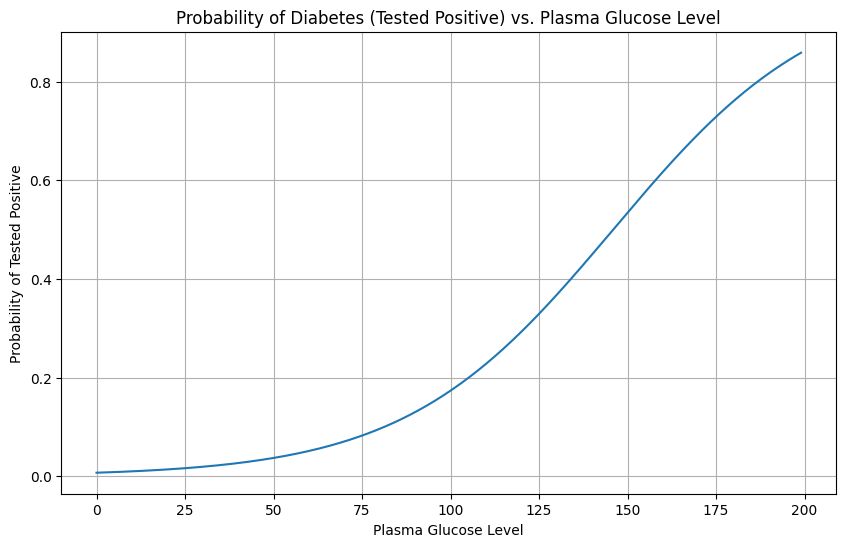

In [9]:
import pandas as pd
dia=pd.read_excel("/content/drive/MyDrive/extra_need/Datas/diabetes (1).xlsx")
ind=dia[['age','mass','insu','plas']]
dep=dia['class']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the mean values for other independent variables
mean_age = ind['age'].mean()
mean_mass = ind['mass'].mean()
mean_insu = ind['insu'].mean()

# Create a range of plasma glucose values for plotting
plas_range = np.linspace(ind['plas'].min(), ind['plas'].max(), 500)

# Create a DataFrame for prediction, holding other variables constant at their means
# Ensure column names match the training data to avoid UserWarning
prediction_df = pd.DataFrame({
    'age': [mean_age] * len(plas_range),
    'mass': [mean_mass] * len(plas_range),
    'insu': [mean_insu] * len(plas_range),
    'plas': plas_range
}, columns=['age', 'mass', 'insu', 'plas'])

# Predict probabilities for the 'tested_positive' class
# Assuming 'tested_positive' is the second class (index 1) after sorting alphabetically, or based on model's classes_
positive_class_index = np.where(Logr.classes_ == 'tested_positive')[0][0]
probabilities = Logr.predict_proba(prediction_df)[:, positive_class_index]

# Plot the logistic regression curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=plas_range, y=probabilities)
plt.title('Probability of Diabetes (Tested Positive) vs. Plasma Glucose Level')
plt.xlabel('Plasma Glucose Level')
plt.ylabel('Probability of Tested Positive')
plt.grid(True)
plt.show()